In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler


In [7]:
df = pd.read_csv('bank_additional_full.csv', delimiter= ';')

df = df.drop(['previous'], axis=1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
df1 = pd.read_csv('bank_additional_full.csv', delimiter= ';')
df1
df1['education'] = df['education'].replace(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], [1,2,3,4,5,6,7,8])

df1['job'] = df1['job'].replace(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], [1,2,3,4,5,6,7,8,9,10,11,12])


df['housing'] = df['housing'].replace(['no', 'yes', 'unknown'], [1,2,3])


1. labelling the values to numeric


In [9]:
df['job'] = df['job'].replace(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], [1,2,3,4,5,6,7,8,9,10,11,12])

df['education'] = df['education'].replace(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], [1,2,3,4,5,6,7,8])

df['housing'] = df['housing'].replace(['no', 'yes', 'unknown'], [1,2,3])
df['loan'] = df['loan'].replace(['no', 'yes', 'unknown'], [1,2,3])
df['marital'] = df['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1,2,3,4])
df['poutcome'] = df['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3])

df['month'] = df['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr','sep'], [1,2,3,4,5,6,7,8,9,10])
df['day_of_week'] = df['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1,2,3,4,5])

df['contact'] = df['contact'].replace(['telephone', 'cellular'], [1,2])

df['y'] = df['y'].replace(['no', 'yes'], [0,1])

df['default'] = df['default'].replace(['no', 'unknown', 'yes'], [0,1,2])

2. Dropping unnecessary columns with single values

In [10]:
df = df.drop(['pdays'],axis = 1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,0,1,1,1,1,1,261,1,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,1,2,1,1,1,1,1,1,149,1,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,1,2,0,2,1,1,1,1,226,1,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,1,3,0,1,1,1,1,1,151,1,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,1,2,0,1,2,1,1,1,307,1,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,0,2,1,2,6,5,334,1,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,4,1,5,0,1,1,2,6,5,383,1,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,1,7,0,2,1,2,6,5,189,2,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,5,1,5,0,1,1,2,6,5,442,1,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

3. replace NULL values if there are any


In [12]:
col_names = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact','month', 'day_of_week', 'duration', 'campaign', 'emp.var.rate',
             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
for col in col_names:
    mode_value = df[col].mode().values
    df[col].fillna(mode_value[0], inplace = True)

This cell is to create a dataframe copy of DF for visualization.

In [13]:
col_name = ['cons.price.idx']
for col in col_name:
    mode_value = df[col].mode().values
    df[col].fillna(mode_value[0], inplace = True)

def scaler_from_0to1(series):
     return (series - series.min()) / (series.max() - series.min())

for col in col_name:
    df[col] = scaler_from_0to1(df[col])
df1 = df.copy(deep = True)


4. Rescale dataset columns to the range from 0 to 1

In [14]:
def scaler_from_0to1(series):
     return (series - series.min()) / (series.max() - series.min())

In [15]:
for col in col_names:
    df[col] = scaler_from_0to1(df[col])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,0.000000,0.0,0.000000,0,0.0,0.0,0.0,0.000000,0.0,0.053070,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
1,0.493827,0.090909,0.0,0.142857,1,0.0,0.0,0.0,0.000000,0.0,0.030297,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
2,0.246914,0.090909,0.0,0.142857,0,0.5,0.0,0.0,0.000000,0.0,0.045954,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
3,0.283951,0.181818,0.0,0.285714,0,0.0,0.0,0.0,0.000000,0.0,0.030704,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
4,0.481481,0.090909,0.0,0.142857,0,0.0,0.5,0.0,0.000000,0.0,0.062424,0.000000,1,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.454545,0.0,0.571429,0,0.5,0.0,1.0,0.555556,1.0,0.067914,0.000000,1,0.479167,1.000000,0.00000,0.089322,0.000000,1.0
41184,0.358025,0.272727,0.0,0.571429,0,0.0,0.0,1.0,0.555556,1.0,0.077877,0.000000,1,0.479167,1.000000,0.00000,0.089322,0.000000,0.0
41185,0.481481,0.454545,0.0,0.857143,0,0.5,0.0,1.0,0.555556,1.0,0.038430,0.018182,1,0.479167,1.000000,0.00000,0.089322,0.000000,0.0
41186,0.333333,0.363636,0.0,0.571429,0,0.0,0.0,1.0,0.555556,1.0,0.089874,0.000000,1,0.479167,1.000000,0.00000,0.089322,0.000000,1.0


5. Finding correlation to find the dependencies and remove over headed columns

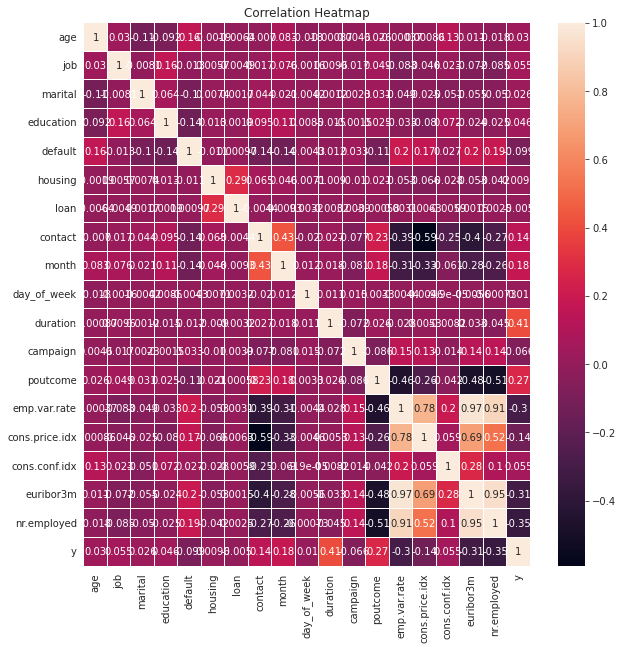

In [16]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, cmap = 'rocket', linewidth = 0.01)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
df = df.drop(['nr.employed'],axis = 1)
df = df.drop(['euribor3m'],axis = 1)
df = df.drop(['emp.var.rate'],axis = 1)
#df = df.drop(['pdays'],axis = 1)


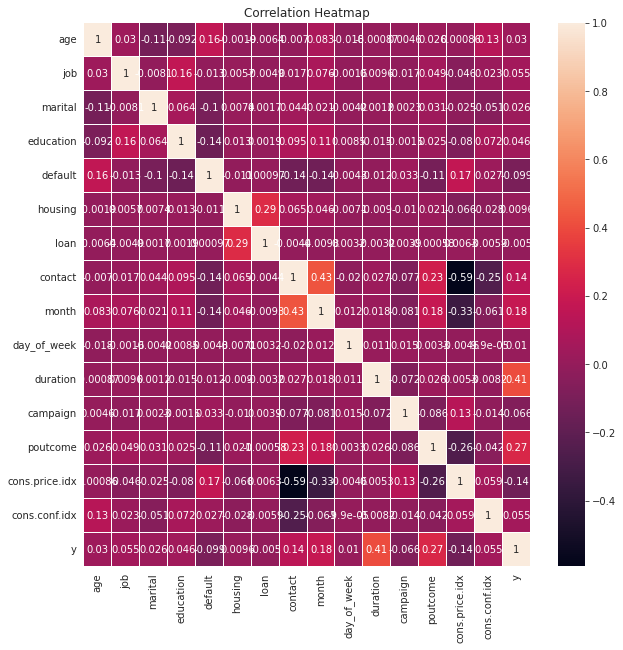

In [18]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, cmap = 'rocket', linewidth = 0.01)
plt.title("Correlation Heatmap")
plt.show()

6. Convert normalized data's datatypes to float

In [19]:
for col in df.columns:
    df[col] = df[col].astype('float',errors = 'raise')

7. Renaming the fields

In [20]:
df.columns = [c.replace('.', '_') for c in df.columns]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons_price_idx,cons_conf_idx,y
0,0.481481,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.053070,0.000000,1.0,0.698753,0.60251,0.0
1,0.493827,0.090909,0.0,0.142857,1.0,0.0,0.0,0.0,0.000000,0.0,0.030297,0.000000,1.0,0.698753,0.60251,0.0
2,0.246914,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.000000,0.0,0.045954,0.000000,1.0,0.698753,0.60251,0.0
3,0.283951,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.000000,0.0,0.030704,0.000000,1.0,0.698753,0.60251,0.0
4,0.481481,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.000000,0.0,0.062424,0.000000,1.0,0.698753,0.60251,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.454545,0.0,0.571429,0.0,0.5,0.0,1.0,0.555556,1.0,0.067914,0.000000,1.0,1.000000,0.00000,1.0
41184,0.358025,0.272727,0.0,0.571429,0.0,0.0,0.0,1.0,0.555556,1.0,0.077877,0.000000,1.0,1.000000,0.00000,0.0
41185,0.481481,0.454545,0.0,0.857143,0.0,0.5,0.0,1.0,0.555556,1.0,0.038430,0.018182,1.0,1.000000,0.00000,0.0
41186,0.333333,0.363636,0.0,0.571429,0.0,0.0,0.0,1.0,0.555556,1.0,0.089874,0.000000,1.0,1.000000,0.00000,1.0


8. Removing records with duplicate data

In [21]:
df2 = df.drop_duplicates(keep='first')


In [22]:
from sklearn.feature_selection import VarianceThreshold


9. Remove columns that has low variance

In [23]:
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(df)
print(X_sel.shape)


(41188, 16)


In [24]:
print(df.isnull().sum())    


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
poutcome          0
cons_price_idx    0
cons_conf_idx     0
y                 0
dtype: int64


Visualization

In [25]:
df1.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,4.673691,1.510634,4.277532,0.208872,1.571914,1.199767,1.634748,3.250097,2.979581,258.285010,2.567593,1.169904,0.081886,0.535723,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.454116,0.696779,2.185525,0.406686,0.541209,0.456002,0.481507,2.429079,1.411514,259.279249,2.770014,0.455754,1.570960,0.225581,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-3.400000,0.000000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,102.000000,1.000000,1.000000,-1.800000,0.340608,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,4.000000,1.000000,4.000000,0.000000,2.000000,1.000000,2.000000,3.000000,3.000000,180.000000,2.000000,1.000000,1.100000,0.603274,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,5.000000,2.000000,7.000000,0.000000,2.000000,1.000000,2.000000,4.000000,4.000000,319.000000,3.000000,1.000000,1.400000,0.698753,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,12.000000,4.000000,8.000000,2.000000,3.000000,3.000000,2.000000,10.000000,5.000000,4918.000000,56.000000,3.000000,1.400000,1.000000,-26.900000,5.045000,5228.100000,1.000000


In [26]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons_price_idx,cons_conf_idx,y
0,0.481481,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.053070,0.000000,1.0,0.698753,0.60251,0.0
1,0.493827,0.090909,0.0,0.142857,1.0,0.0,0.0,0.0,0.000000,0.0,0.030297,0.000000,1.0,0.698753,0.60251,0.0
2,0.246914,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.000000,0.0,0.045954,0.000000,1.0,0.698753,0.60251,0.0
3,0.283951,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.000000,0.0,0.030704,0.000000,1.0,0.698753,0.60251,0.0
4,0.481481,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.000000,0.0,0.062424,0.000000,1.0,0.698753,0.60251,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.454545,0.0,0.571429,0.0,0.5,0.0,1.0,0.555556,1.0,0.067914,0.000000,1.0,1.000000,0.00000,1.0
41184,0.358025,0.272727,0.0,0.571429,0.0,0.0,0.0,1.0,0.555556,1.0,0.077877,0.000000,1.0,1.000000,0.00000,0.0
41185,0.481481,0.454545,0.0,0.857143,0.0,0.5,0.0,1.0,0.555556,1.0,0.038430,0.018182,1.0,1.000000,0.00000,0.0
41186,0.333333,0.363636,0.0,0.571429,0.0,0.0,0.0,1.0,0.555556,1.0,0.089874,0.000000,1.0,1.000000,0.00000,1.0


Plot on distribution of education

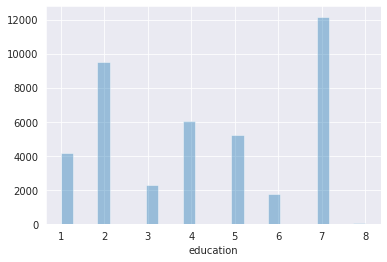

In [27]:
sns.distplot( df1['education'], kde=False)


cons.price.idx: The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods.
Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')

Plot on how rise in CPI impacts outcome of the phone based direct marketing campaign outcomes

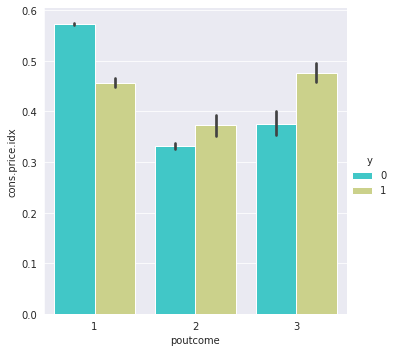

In [28]:
sns.catplot(x="poutcome", y="cons.price.idx", hue="y", kind = 'bar',data=df1, palette = "rainbow")

Based on Age of an individual and their educational background, the plot shows whether if the contact has a personal loan

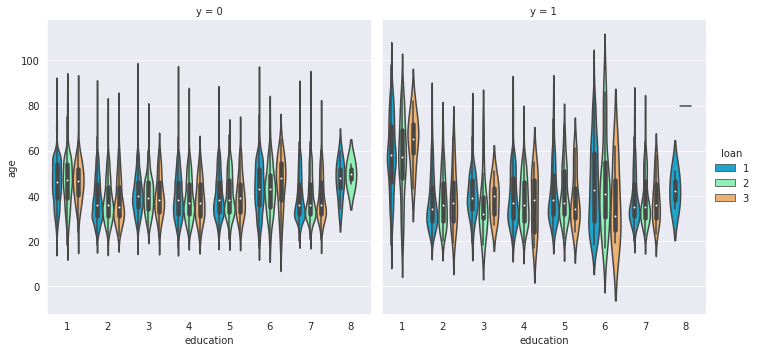

In [29]:
sns.catplot(x="education", y="age", hue="loan",col="y", kind = 'violin',data=df1, palette = "rainbow")

The following graph show cases the impact on output based on the call duration on each campaign phone call.

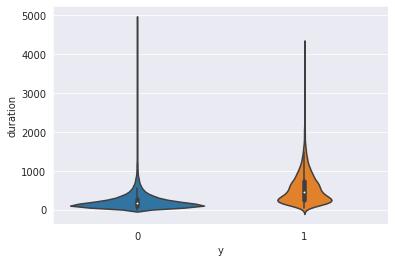

In [30]:
sns.violinplot(x='y', y='duration',data=df1)


This consumer confidence indicator provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings.

The score is relative to 1985, so anything above 100 means consumers feel more optimistic about the economy than they did in 1985 and anything below 100 means they feel less confident than in 1985.

The following graph shows how marital status impacts the customer sentiment about the economic systems.

['married', 'single', 'divorced', 'unknown'], [1,2,3,4]

df1['cons.conf.idx'].unique() ranges from [-35 to -50]

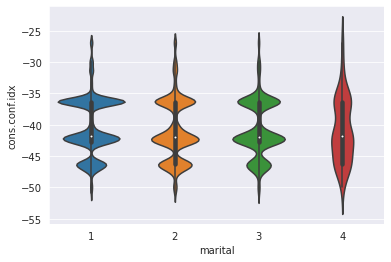

In [31]:
sns.violinplot(x='marital', y='cons.conf.idx',data=df1)


The following graph show cases the call duration on each campaign phone call based on individuals of different age groups is proportionate to their interest to know more details about the campaign  to subscribe to a term deposit.

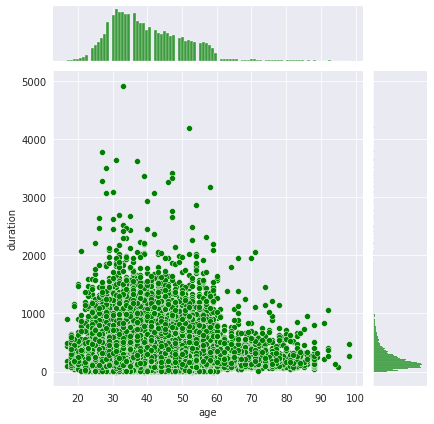

In [32]:
sns.jointplot(x="age", y="duration", data=df1, color ='green')


The following graph shows the subsription status of the candidates according to the type of job at a specific age.

JOB: ['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], [1,2,3,4,5,6,7,8,9,10,11,12]

result: It looks like 'admin.', 'blue-collar', 'technician' job type candidates didn't show interest to subscribe and age group 40 to 60 being an entrepreneur, self-employed, retired opted IN

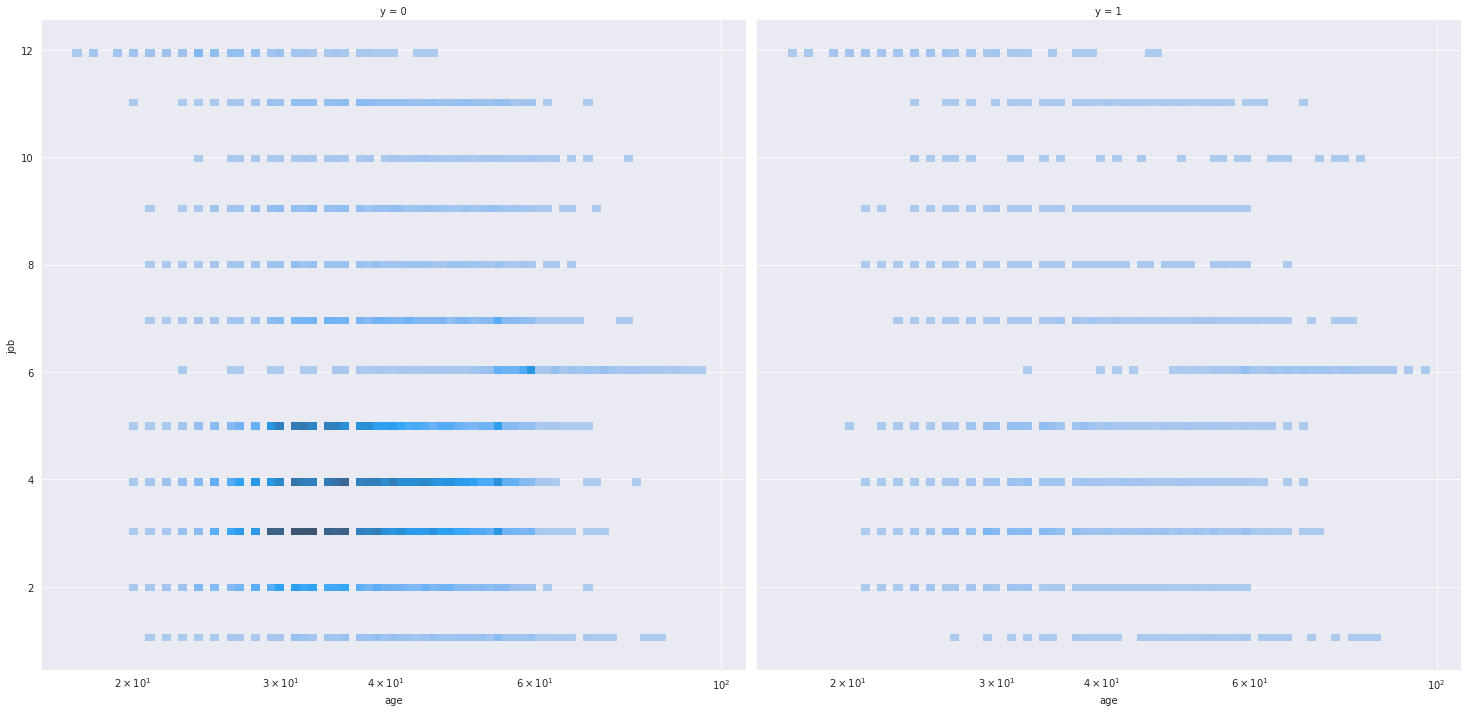

In [33]:
sns.displot(
    data=df1, x="age", y="job", col="y",
    log_scale=(True, False), col_wrap=10, height=10, aspect=1,
)


Correlation

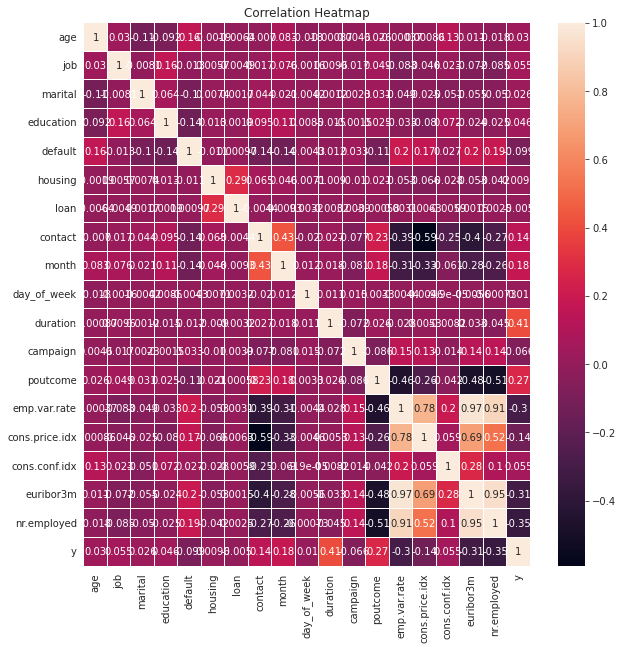

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(df1.corr(), annot=True, cmap = 'rocket', linewidth = 0.01)
plt.title("Correlation Heatmap")
plt.show()

majority of the data collected in the dataset are between age group 20 to 45 working as 'admin.', 'blue-collar', 'technician' or 'retired'

Job Labels:
(['housemaid', 'services', 'admin.', 'blue-collar', 'technician','retired', 'management', 'unemployed', 'self-employed', 'unknown','entrepreneur', 'student'], [1,2,3,4,5,6,7,8,9,10,11,12])

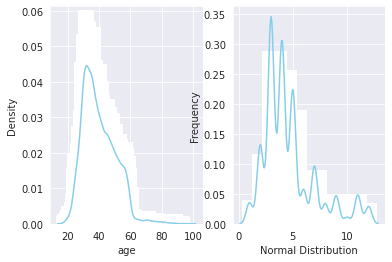

In [35]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
ax = sns.distplot(df1['age'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

plt.subplot(1, 2, 2) # index 2

ax = sns.distplot(df1['job'],
                  bins=12,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})               
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()

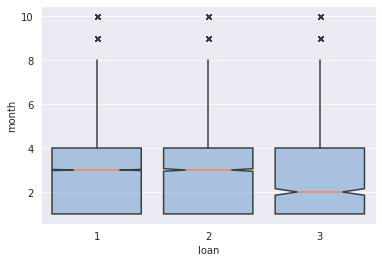

In [36]:
sns.boxplot(
    data=df1, x="loan", y="month",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

## Import libraries

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot


In [38]:
X = df.iloc[:,:-1]
X
x = df.iloc[:,df.columns != 'y']

Y = df.y
# X = X[1:]
print(x)
print(Y)
print(type(X),type(Y))
print(len(X),len(Y))


            age       job  marital  education  default  housing  loan  \
0      0.481481  0.000000      0.0   0.000000      0.0      0.0   0.0   
1      0.493827  0.090909      0.0   0.142857      1.0      0.0   0.0   
2      0.246914  0.090909      0.0   0.142857      0.0      0.5   0.0   
3      0.283951  0.181818      0.0   0.285714      0.0      0.0   0.0   
4      0.481481  0.090909      0.0   0.142857      0.0      0.0   0.5   
...         ...       ...      ...        ...      ...      ...   ...   
41183  0.691358  0.454545      0.0   0.571429      0.0      0.5   0.0   
41184  0.358025  0.272727      0.0   0.571429      0.0      0.0   0.0   
41185  0.481481  0.454545      0.0   0.857143      0.0      0.5   0.0   
41186  0.333333  0.363636      0.0   0.571429      0.0      0.0   0.0   
41187  0.703704  0.454545      0.0   0.571429      0.0      0.5   0.0   

       contact     month  day_of_week  duration  campaign  poutcome  \
0          0.0  0.000000          0.0  0.053070  0.0

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

## RandomForest

In [40]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_predict_rf = rf.predict(x_test)
rf_acc = accuracy_score(y_test, y_predict_rf)*100
print(rf_acc)

90.90997377877052


Logistic: f1=0.544 auc=0.613


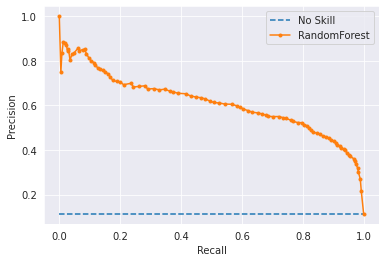

In [41]:
lr_probs = rf.predict_proba(x_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = y_predict_rf
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='RandomForest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


## Decision Trees

In [42]:

clf_DT1 = tree.DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')

clf_DT = clf_DT1.fit(x_train,y_train)

y_predict_DT = clf_DT.predict(x_test)

In [43]:
x_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'cons_price_idx', 'cons_conf_idx'],
      dtype='object')

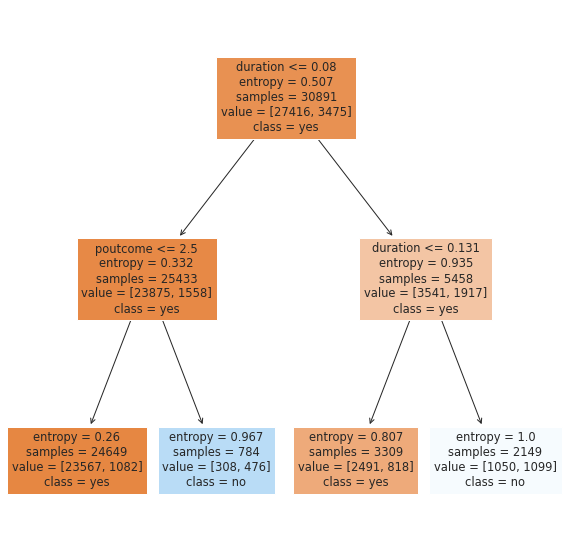

In [44]:
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'cons_price_idx', 'cons_conf_idx']

classes = ['yes','no']

fig = plt.figure(figsize = (10,10))

plot = tree.plot_tree(clf_DT,
                     feature_names = features,
                     class_names = classes,
                     filled = True)

Logistic: f1=0.513 auc=0.471


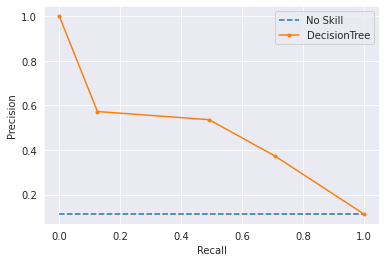

In [45]:
lr_probs = clf_DT1.predict_proba(x_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = y_predict_DT
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='DecisionTree')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [46]:
DT_acc = accuracy_score(y_test,y_predict_DT)
DT_acc

0.8943381567446829

In [47]:
DT_precision_score = precision_score(y_test,y_predict_DT)
DT_precision_score

0.5360149672591207

In [48]:
DT_recall = recall_score(y_test,y_predict_DT)
DT_recall

0.4918454935622318

## SVM

In [49]:
clf_svm = svm.SVC(kernel='rbf', C = 10,probability=True)
clf_svm.fit(x_train,y_train)
y_predict_SVM = clf_svm.predict(x_test)
print(f1_score(y_test,y_predict_SVM))
svm_acc = accuracy_score(y_test,y_predict_SVM)

0.3871351995235259


Logistic: f1=0.387 auc=0.570


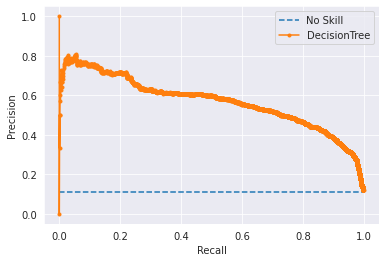

In [50]:
lr_probs = clf_svm.predict_proba(x_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = y_predict_SVM
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='DecisionTree')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


**checking data on resultant field**

In [51]:
df['y'].value_counts()

0.0    36548
1.0     4640
Name: y, dtype: int64

In [52]:
datano = df[df.y == 0]
datayes = df[df.y == 1]
balanced_df = pd.concat([datano.sample(len(datayes), random_state=5), datayes])
print("Balanced data shape:", len(balanced_df))

Balanced data shape: 9280


In [53]:
balanced_df['y'].value_counts()

0.0    4640
1.0    4640
Name: y, dtype: int64

In [54]:
balanced_df.value_counts()

age       job       marital   education  default  housing  loan  contact  month     day_of_week  duration  campaign  poutcome  cons_price_idx  cons_conf_idx  y  
0.345679  0.181818  0.000000  0.857143   0.0      0.0      0.0   1.0      0.222222  0.75         0.051240  0.000000  1.0       0.104443        0.719665       1.0    2
0.000000  1.000000  0.333333  0.428571   0.0      1.0      1.0   1.0      0.333333  1.00         0.101261  0.018182  2.0       0.000000        0.811715       1.0    1
0.333333  0.363636  0.000000  0.571429   0.0      0.0      0.0   0.0      0.555556  0.25         0.038430  0.000000  1.0       0.389322        0.368201       0.0    1
                    0.333333  0.857143   0.0      0.5      0.0   1.0      0.333333  0.50         0.155144  0.036364  1.0       0.484412        0.615063       1.0    1
                    0.666667  0.428571   1.0      0.5      0.5   0.0      0.000000  0.25         0.078894  0.018182  1.0       0.698753        0.602510       0.0    1
   

## Performing balancing

In [55]:
X1 = balanced_df.iloc[:,:-1]
X1
x1 = balanced_df.iloc[:,balanced_df.columns != 'y']

Y1 = balanced_df.y
# X = X[1:]
print(x1)
print(Y1)
print(type(X1),type(Y1))
print(len(X1),len(Y1))


            age       job   marital  education  default  housing  loan  \
14386  0.172840  0.181818  0.333333   0.142857      0.0      0.0   0.0   
37838  0.518519  0.454545  0.000000   0.714286      0.0      0.0   0.0   
25020  0.358025  0.181818  0.666667   0.142857      0.0      0.0   0.0   
9774   0.518519  0.272727  0.000000   0.000000      1.0      0.5   0.5   
29519  0.283951  0.545455  0.000000   0.857143      1.0      0.0   0.0   
...         ...       ...       ...        ...      ...      ...   ...   
41174  0.555556  0.454545  0.000000   0.857143      0.0      0.5   0.0   
41178  0.555556  0.454545  0.000000   0.857143      0.0      0.0   0.0   
41181  0.246914  0.181818  0.000000   0.857143      0.0      0.5   0.0   
41183  0.691358  0.454545  0.000000   0.571429      0.0      0.5   0.0   
41186  0.333333  0.363636  0.000000   0.571429      0.0      0.0   0.0   

       contact     month  day_of_week  duration  campaign  poutcome  \
14386      1.0  0.222222         0.00  0

In [56]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1)

In [57]:
clf_svm = svm.SVC(kernel='rbf', C = 10)
clf_svm.fit(x_train1,y_train1)
y_predict_SVM = clf_svm.predict(x_test1)
print(f1_score(y_test1,y_predict_SVM))
print(accuracy_score(y_test1,y_predict_SVM))
svm_acc_lb = accuracy_score(y_test1,y_predict_SVM)

0.8511166253101737
0.8448275862068966


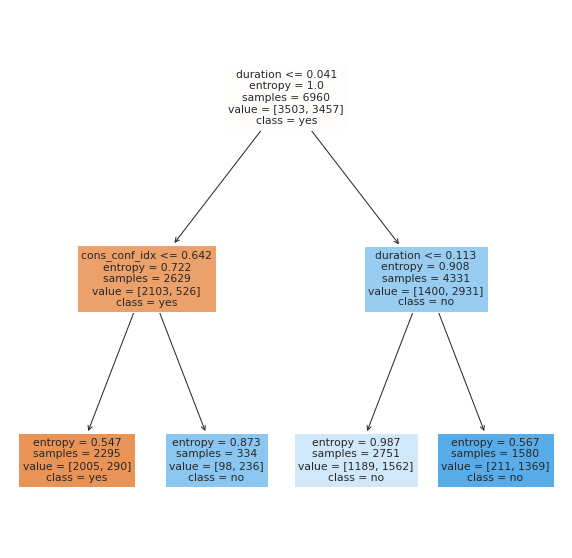

In [58]:

clf_DT1 = tree.DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')

clf_DT = clf_DT1.fit(x_train1,y_train1)

y_predict_DT_lb = clf_DT.predict(x_test1)

features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'cons_price_idx', 'cons_conf_idx']

classes = ['yes','no']

fig = plt.figure(figsize = (10,10))

plot = tree.plot_tree(clf_DT,
                     feature_names = features,
                     class_names = classes,
                     filled = True)

In [59]:
print(accuracy_score(y_test1,y_predict_DT_lb))

print(f1_score(y_test1,y_predict_DT_lb))
DT_acc_lb = accuracy_score(y_test1,y_predict_DT_lb)

0.7366379310344827
0.7793427230046949


In [60]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train1, y_train1)
rfy_pred = rf.predict(x_test1)
rf_acc_lb = accuracy_score(y_test1, rfy_pred)*100
print(rf_acc_lb)
# accquestions = importance(rf,X)

88.23275862068965


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train1, y_train1)

LogisticRegression()

In [62]:
y_predict_LR = logreg.predict(x_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.81


In [63]:
print(svm_acc,rf_acc,DT_acc,svm_acc_lb,rf_acc_lb,DT_acc_lb)

0.9000679809653297 90.90997377877052 0.8943381567446829 0.8448275862068966 88.23275862068965 0.7366379310344827


## KMeans

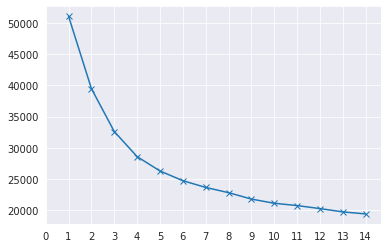

In [64]:
from sklearn.cluster import KMeans
inertia = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X)
    inertia.append(km.inertia_)
plt.plot(K,inertia,marker = "x")
plt.xticks(np.arange(15))
plt.show()

In [65]:
km = KMeans(n_clusters = 2, n_init = 3, init = 'random', random_state = 42)

km.fit(X)

y_meanss = km.predict(X)
print(y_meanss.size)

41188


In [66]:
km.cluster_centers_


array([[ 2.83634073e-01,  3.36910638e-01,  1.77814237e-01,
         4.90976382e-01,  1.66774772e-01,  2.99305582e-01,
         9.91453318e-02,  9.97519936e-01,  3.39005685e-01,
         4.89564653e-01,  5.36371447e-02,  2.55484757e-02,
         1.25235606e+00,  4.34254481e-01,  3.94440985e-01],
       [ 2.85321260e-01,  3.28830059e-01,  1.56908561e-01,
         4.28399760e-01,  2.82528874e-01,  2.62600975e-01,
         1.01174978e-01, -6.08402217e-14,  9.42949759e-02,
         5.04222578e-01,  5.05606453e-02,  3.36689547e-02,
         1.02563589e+00,  7.13263209e-01,  4.94565195e-01]])

In [67]:
labels = km.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(Y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(Y.size)))


Result: 23067 out of 41188 samples were correctly labeled.
Accuracy score: 0.56
